# Heart Disease Prediction with Machine Learning Algorithms

In this notebook, I used various Python-based machine learning and data science libraries to develop a predictive model that determines the likelihood of heart disease based on an individual's health characteristics.

## Problem Definition
In a statement
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Data Information

The original data came from the Cleveland database from UCI Machine Learning Repository. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them, so that's what I decided to use here.  
This is the kaggle version that I used: (https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)


| **Feature**   | **Description**                                                                                       | **Example Values**                                                                                                   |
|---------------|-------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| **age**       | Age in years                                                                                          | 29, 45, 60                                                                                                          |
| **sex**       | 1 = male; 0 = female                                                                                  | 0, 1                                                                                                                |
| **cp**        | Chest pain type                                                                                       | 0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic                                          |
| **trestbps**  | Resting blood pressure (in mm Hg on admission to the hospital)                                        | 120, 140, 150                                                                                                       |
| **chol**      | Serum cholesterol in mg/dl                                                                            | 180, 220, 250                                                                                                       |
| **fbs**       | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                 | 0, 1                                                                                                                |
| **restecg**   | Resting electrocardiographic results                                                                  | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy                                       |
| **thalach**   | Maximum heart rate achieved                                                                           | 160, 180, 190                                                                                                       |
| **exang**     | Exercise induced angina (1 = yes; 0 = no)                                                             | 0, 1                                                                                                                |
| **oldpeak**   | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest       | 0.5, 1.0, 2.0                                                                                                      |
| **slope**     | The slope of the peak exercise ST segment                                                             | 0: Upsloping, 1: Flatsloping, 2: Downsloping                                                                        |
| **ca**        | Number of major vessels (0-3) colored by fluoroscopy                                                  | 0, 1, 2, 3                                                                                                         |
| **thal**      | Thalium stress result                                                                                 | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect                                                         |
| **target**    | Have disease or not (1 = yes; 0 = no)                                                                 | 0, 1                                                                                                                |




## Preparing the Tools 

* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation.

In [7]:
# Importing all the tools I need

# EDA + Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns 

# Modeling
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Date update
import datetime
print(f"This notebook was last updated: {datetime.datetime.now()}\n")

This notebook was last updated: 2025-01-14 15:40:40.793424



## Load Data

In [11]:
df = pd.read_csv("heart-disease.csv")
df.shape # rows, columns

(303, 14)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis (EDA)

In [13]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [14]:
# normalized value counts
df.target.value_counts(normalize = True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

These two values are relatively close, so we can consider the `target` column as balanced

<Axes: xlabel='target'>

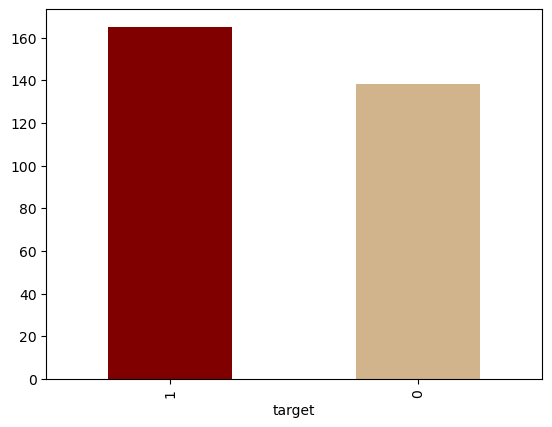

In [16]:
df.target.value_counts().plot(kind = "bar", color = ["maroon", "tan"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

There are 207 males and 96 females in our study.

In [20]:
# Compare target column with sex column
pd.crosstab(index = df.target, columns = df.sex)

sex,0,1
target,,
0,24,114
1,72,93


So I'm going to make a VERY simple baseline here: 
* There are about 96 women in this study and 72 of them are positive for heart disease so I can infer that there is ~72% chance of heart disease, if a participant is a woman.
* And then if the participant is male, there is about ~50% chance he has heart disease (bc 96/207 men in this study have heart disease)
- If we average these two, then we can infer that if we take **NO** other parameters into account: if the participant is a person, there is ~62.5% chance they have heart disease.

## Making comparison visuals

### Comparing Sex & Heart Disease Frequency

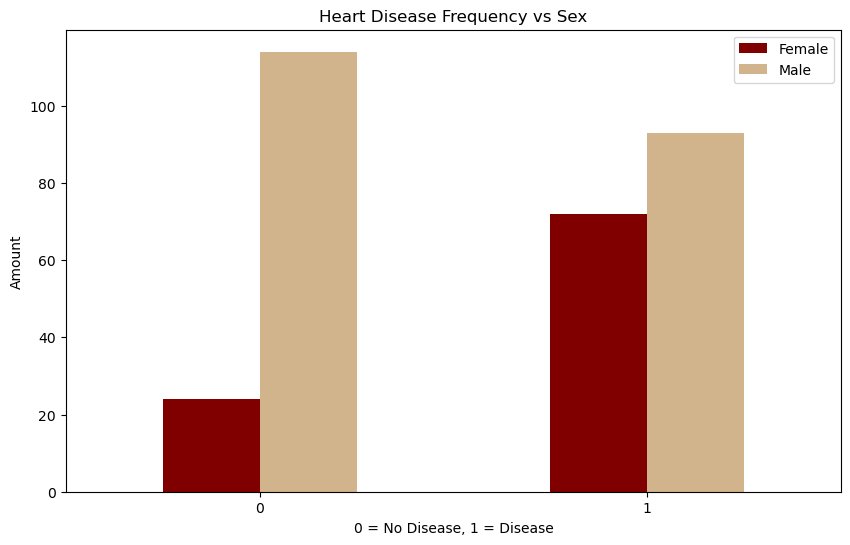

In [32]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["maroon", "tan"])


plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

### Comparing Age and Maximum Heart Rate

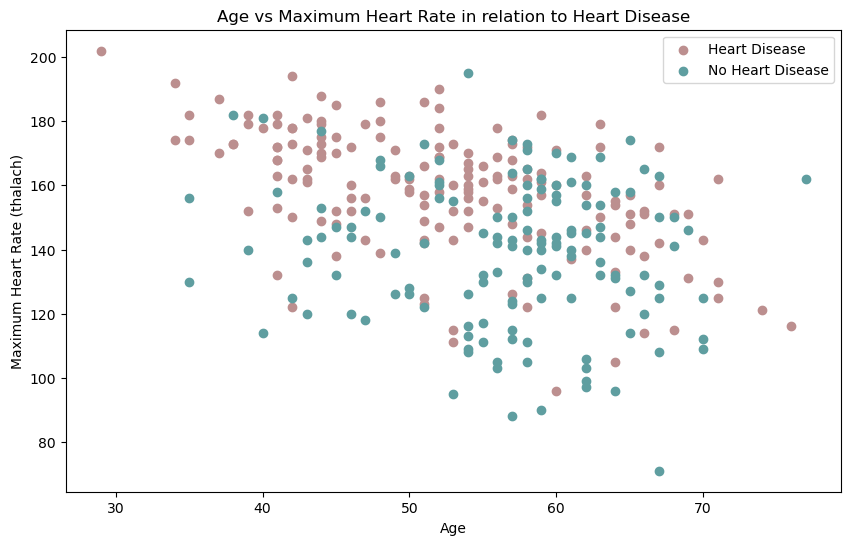

In [39]:
plt.figure(figsize = (10,6))

plt.scatter(df.age[df.target == 1], 
            df.thalach[df.target == 1], 
            c = "rosybrown")
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "cadetblue")
plt.title("Age vs Maximum Heart Rate in relation to Heart Disease")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.legend(["Heart Disease", "No Heart Disease"])

Ok here are some of my observations: 

This scatter plot shows that the more younger a person is, the higher their max heart rate is. And it seems that there's more purple dots in the younger side too so maybe more heart disease. 

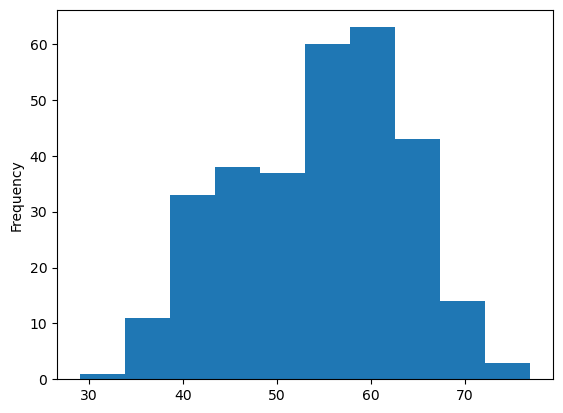

In [41]:
# Let's check the age distribution
df.age.plot.hist();

Looks like the age distribution is normal with a slight sway to the right which is also reflected in the scatterplot above.

### Comparing Heart Disease Frequency and Chest Pain

In [42]:
pd.crosstab(index = df.cp, columns = df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


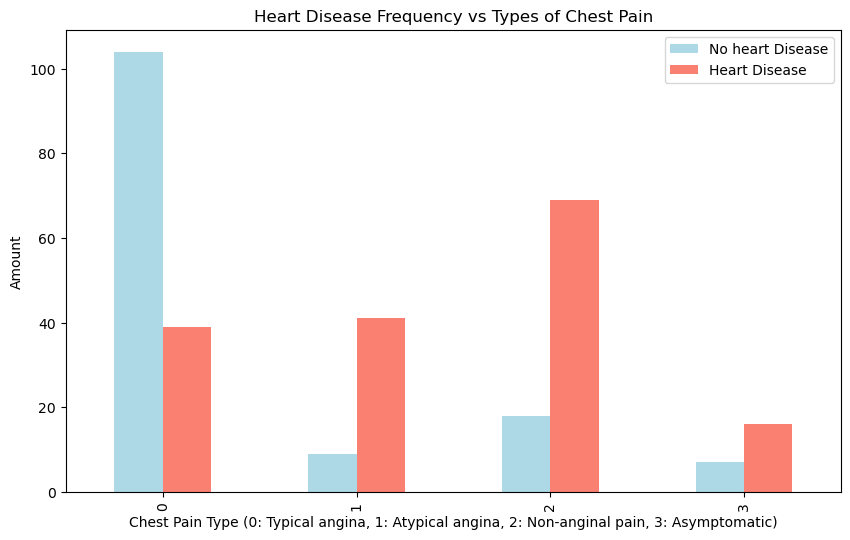

In [46]:
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize = (10,6),
                                   color = ["lightblue", "salmon"]);

plt.title("Heart Disease Frequency vs Types of Chest Pain")
plt.xlabel("Chest Pain Type (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)")
plt.ylabel("Amount")
plt.legend(["No heart Disease", "Heart Disease"])

Ok so as we can see, the category with the highest ratio of participants with heart disease vs not is probably 1:Atypical angina. In the features section in the beginning of the notebook it says that it's not associated with heart disease, yet there are a lot of participants with heart disease in this column. 

According to PubMed, it seems even some medical professionals are confused by what atypical angina even is.

> Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

## Find correlation between independent variables

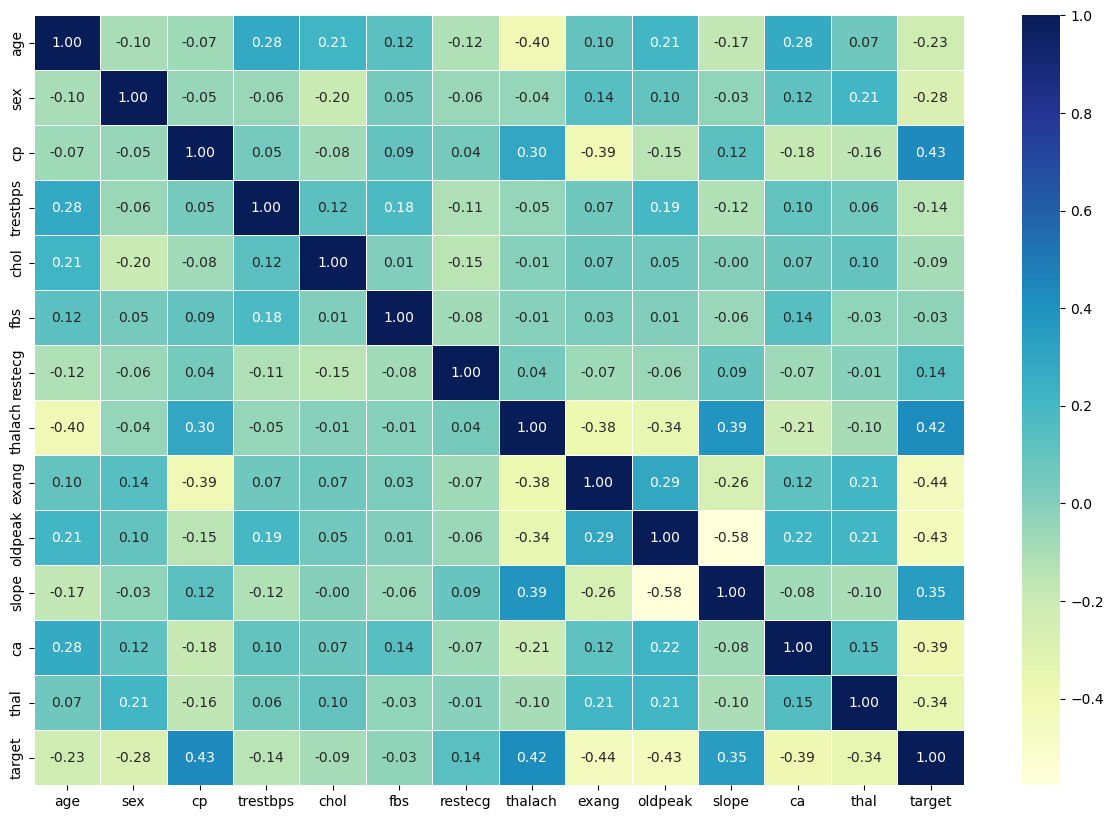

In [48]:
corr_matrix = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, 
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            cmap = "YlGnBu");

## Modeling

In [50]:
X = df.drop("target", axis = 1)
y = df["target"]

In [51]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [53]:
y, type(y)

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64,
 pandas.core.series.Series)

In [54]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [55]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [56]:
len(X_train)

242

In [57]:
len(X_test)

61

## Choosing the model

So I'm going to try these following models and compare their results: 

1. Logistic Regression - `sklearn.linear_model.LogisticRegression()`
2. K-Nearest Neighbors - `sklearn.neighbors.KNeighboursClassifier()`
3. RandomForest - `sklearn.ensemble.RandomForestClassifier()`

So I used this resource from the Scikit-Learn documentation [machine learning model map](https://scikit-learn.org/stable/machine_learning_map.html), and I drew out my thought process:

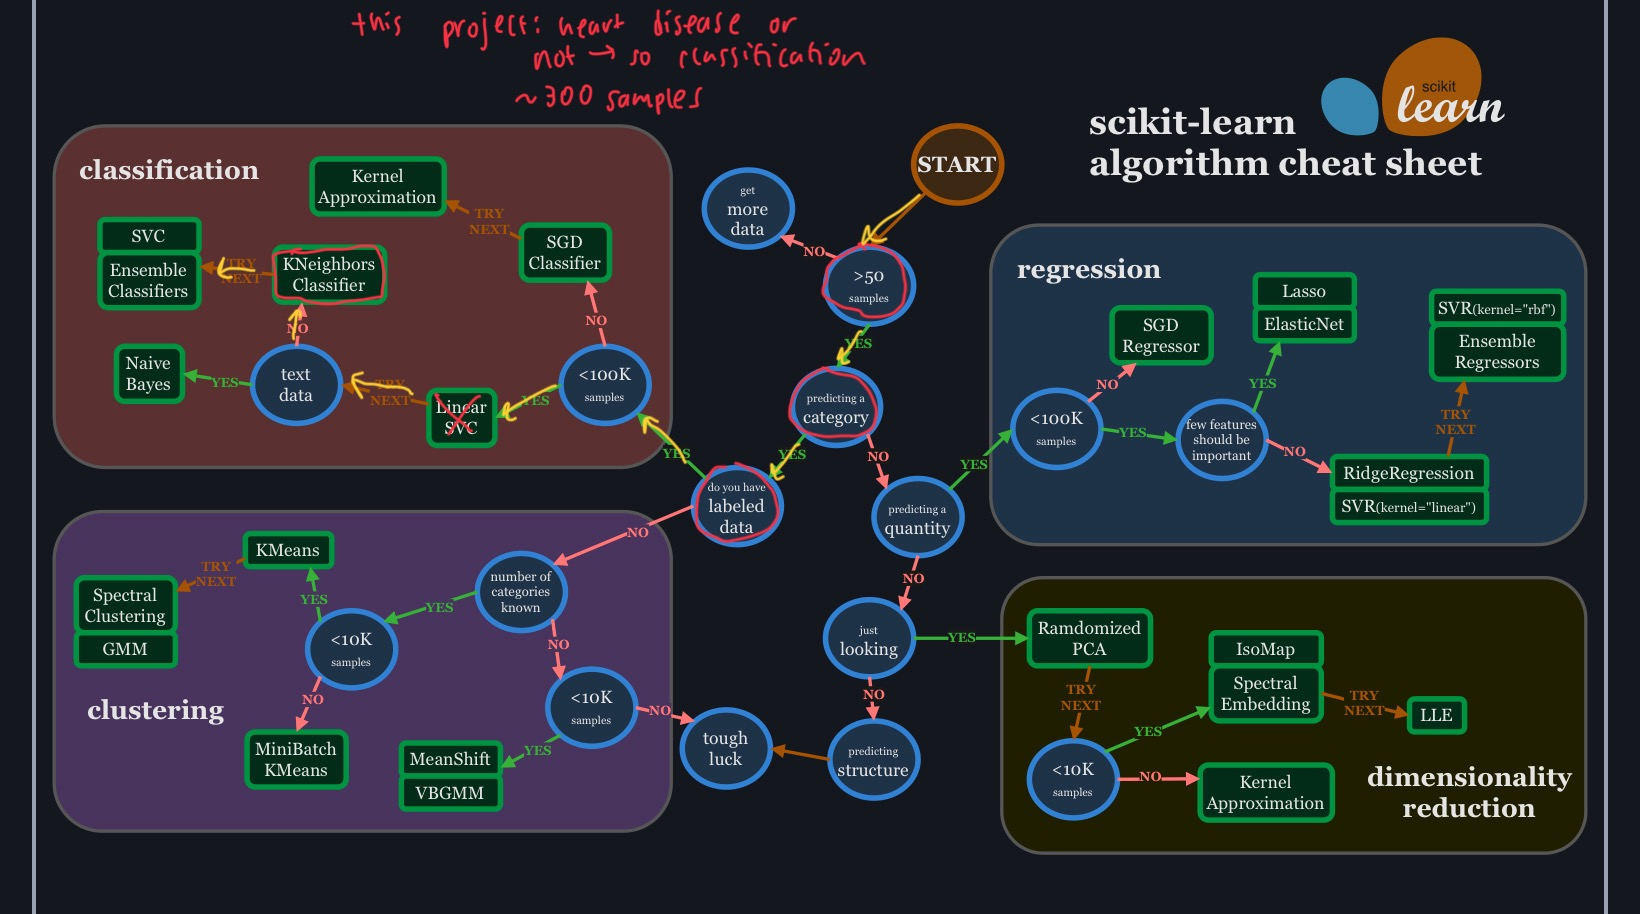

In [62]:
from IPython.display import Image

# Display the image
Image("/Users/sanjanasettipalli/Downloads/IMG_0081.jpg", width = 800, height = 600)

I tried LinearSVC earlier and it doesn't work so I decieded to use Logistic Regression instead.

In [67]:
# Put models in dictionary
models = {"KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression(), "RandomForest": RandomForestClassifier()}

# Build function for fitting and scoring every model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [69]:
model_scores = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model_scores

/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'RandomForest': 0.8360655737704918}

It looks like the **Logistic Regression** model has the highest score of all the models but I still want to compare them visually to get a better sense of the results. 

### Comparing the models

In [72]:
# remember u can only plot using a dataframe
df_model_scores = pd.DataFrame(model_scores, index = ["accuracy"])
df_model_scores

,KNN,Logistic Regression,RandomForest
accuracy,0.688525,0.885246,0.836066


<Axes: >

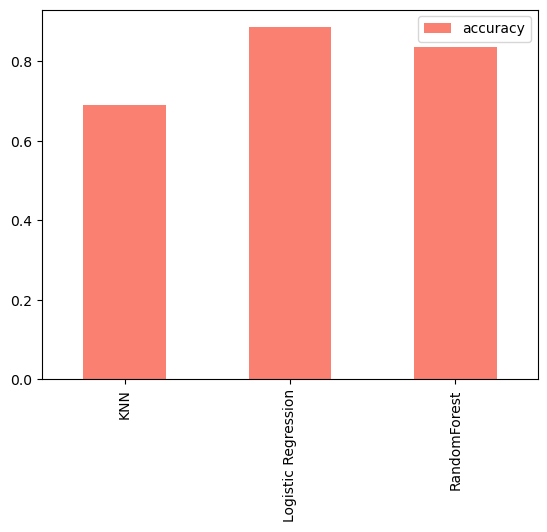

In [75]:
df_model_scores.T.plot(kind = "bar", color = "salmon")

## Hyperparameter tuning and cross-validation

So to test different hyperparameters, I would usually use a validation set but there's not a lot of data so I will be using **cross validation**

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [78]:
# I'm going to try a couple different values of the n_neighbors parameter in the KNN model and see what happens

# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21) # this goes from 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train) 
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
                        
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [79]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN Score on the test data: 75.41%


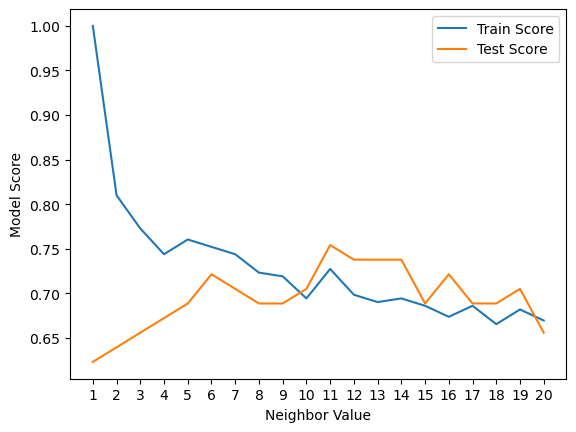

In [83]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xticks(np.arange(1,21))
plt.xlabel("Neighbor Value")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, it seemd like `n_neighbors = 11` is the best value. But even with this score, it doesn't match `LogisticRegression`'s model performance. 

### Tune Models using `RandomizedSearchCV`

In [112]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.arange(0,10,0.05), 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg','liblinear', 'lbfgs', 'sag', 'saga'],
    'fit_intercept': [True, False],
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10,1000, 50),
    "max_depth": [None, 3, 5, 10, 20, 25],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [113]:
# Tune Logistic Regression

np.random.seed(42)

# Hyperparameter search for LogReg
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions = log_reg_grid, cv = 5, n_iter = 20, verbose = True)

# Hyperparameter fit for LogReg
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 ,...
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.5 , 7.55, 7.6 , 7.65,
       7.7 , 7.75, 7.8 , 7.85, 7.9 , 7.95, 8.  , 8.05, 8.1 , 8.15, 8.2 ,
       8.25, 8.3 , 8.35, 8.4 , 8.45, 8.5 , 8.55, 8.6 , 8.65, 8.7 , 8.75,
       8.8 , 8.85, 8.9 , 8.95, 9.  , 9.05, 9.1 , 9.15, 9.2 , 9.25, 9.3 ,
       9.35, 9.4 , 9.45, 9.5 , 9.55, 9.6 , 9.65, 9.7 , 9.75, 9.8 , 9.85,
       9.9 , 9.95]),
                                        'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'liblinear',
                                                   'lbfgs', 'sag', 'saga']},
                   verbose=True)

In [130]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'fit_intercept': False, 'C': 0.55}

In [115]:
round(rs_log_reg.score(X_test, y_test), 4)

0.8852

In [134]:
# Tune RandomForestClassifier
np.random.seed(42)

# Hyperparameter search for RF
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv = 5, n_iter = 20, verbose = True)

# Hyperparameter fit for RF
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 25],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [135]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [136]:
round(rs_rf.score(X_test, y_test), 4) # Saw a good improvement from before hypertuning

0.8689

### Tuning a model with `GridSearchCv`

* [sklearn.model_selection.RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) searches over a grid of hyperparameters performing n_iter combinations (e.g. will explore random combinations of the hyperparameters for a defined number of iterations).
* [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) will test every single possible combination of hyperparameters in the grid (this is a thorough test but can take quite a long time).

In [143]:
# Different LogisticRegression hyperparameters
log_grid_2 = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight': ['balanced', None]
}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_grid_2, cv = 5, verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=True)

In [144]:
gs_log_reg.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [145]:
round(gs_log_reg.score(X_test, y_test), 4)

0.8852

The model got the same results as before because of the similar parameter range. 

## Evaluating the Classification Model

In [149]:
# Make predictions on the test data 
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [152]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### ROC/AUC Curves

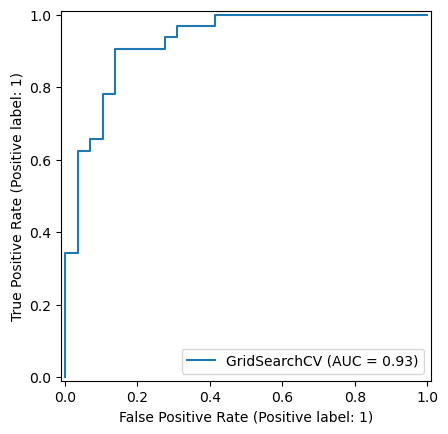

In [153]:
# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator = gs_log_reg, X = X_test, y = y_test);

0.93 is great but since the best AUC score is 1.0, I think the model can do better.

### Confusion Matrix

A confusion matrix basically just shows where the model made the right predictions and where it made the wrong predictions. 

In [154]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


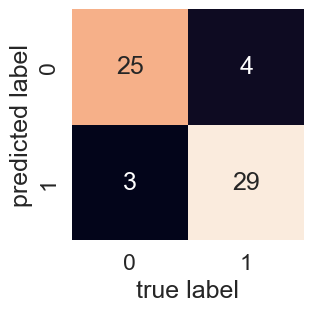

In [167]:
# Make a better visually appealing confusion matrix
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True, # Annotate the boxes
                     cbar = False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

The confusion matrix shows that there are 3 instances when the model predicted 1 when it should have been 0 and 4 instances when the model predicted 0 when it should have been 1.

### Classification Report 

In [171]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [172]:
# Check best paramaters
gs_log_reg.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [174]:
clf = LogisticRegression(C = 1, class_weight = None, penalty = 'l2')

In [175]:
cv_acc = cross_val_score(clf, 
                         X,
                         y,
                         cv = 5,
                         scoring = "accuracy")
cv_acc

/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

array([0.81967213, 0.86885246, 0.83606557, 0.85      , 0.75      ])

In [176]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8249180327868852

In [187]:
# Make function to calculate the rest of the metrics
metrics = ["precision", "recall", "f1"]
cv_metrics = {"precision": 0, "recall": 0, "f1": 0}

def cv_evaluate(model, X, y, metrics):
    for i in metrics:
        cv_metrics[i] = np.mean(cross_val_score(model, X, y, cv = 5, scoring = i))
    return cv_metrics

cv_arr = cv_evaluate(clf, X, y, metrics)
cv_arr

/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sanjanasettipalli/Desktop/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

{'precision': 0.8199035344960641,
 'recall': 0.8787878787878787,
 'f1': 0.8465282072713138}

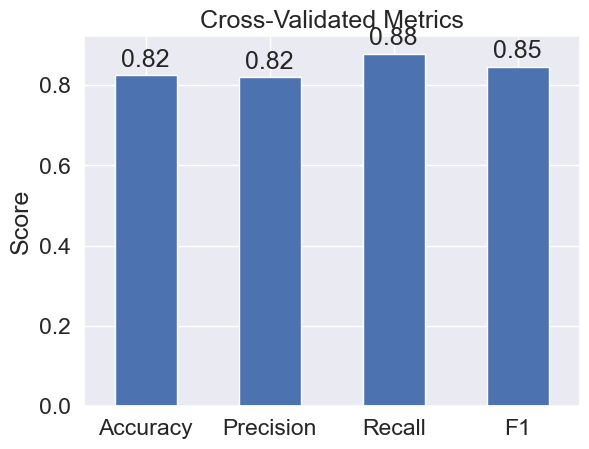

In [196]:
# Visualizing cross-validated metrics
cv_visual = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_arr["precision"],
                            "Recall": cv_arr["recall"],
                            "F1": cv_arr["f1"]},
                          index=[0])
# Transposing the DataFrame and creating the bar plot
ax = cv_visual.T.plot.bar(title="Cross-Validated Metrics", legend=False)

# Adding labels to the bars
rects = ax.patches
labels = [f"{value:.2f}" for value in cv_visual.T.values.flatten()]  # Format labels as 2 decimal points

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 0.01,  # Adjust the height offset for clarity
        label, ha="center", va="bottom"
    )

plt.ylabel("Score")
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.show()

## Feature Importance

Another way of asking which features contribute the most to the outcomes of the model.

In [202]:
# Fit an instance of logistic regression

clf = LogisticRegression(C = 1, class_weight = None, penalty = "l2", max_iter = 10000)
clf.fit(X_train, y_train);

In [203]:
clf.coef_ # these numbers are how much each features contirbutes to how a model makes a decision on whether patterns in a 
          # sample of patients leans towards having heart disease or not

array([[-0.00702847, -1.40972274,  0.79322268, -0.01595481, -0.00292624,
         0.16547636,  0.47998672,  0.01881954, -0.95016585, -0.64677498,
         0.63162025, -0.77685576, -0.91760025]])

In [204]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': -0.007028472052721536,
 'sex': -1.4097227388577385,
 'cp': 0.793222682793746,
 'trestbps': -0.01595480575972854,
 'chol': -0.002926238183721445,
 'fbs': 0.1654763600357775,
 'restecg': 0.4799867231754633,
 'thalach': 0.01881953780373841,
 'exang': -0.9501658542720112,
 'oldpeak': -0.646774981281102,
 'slope': 0.6316202471725538,
 'ca': -0.7768557583715097,
 'thal': -0.917600248098231}

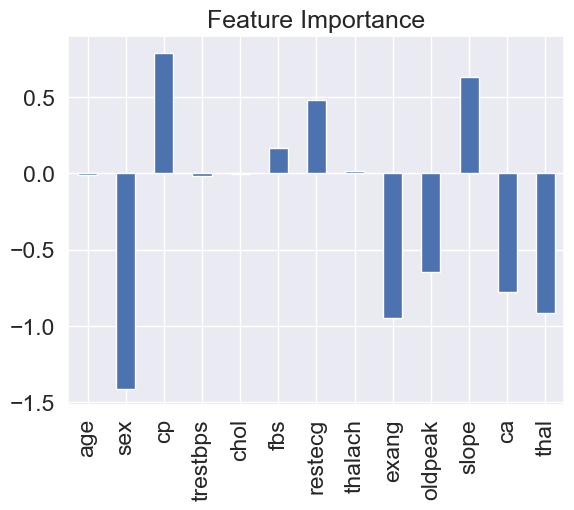

In [205]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [206]:
pd.crosstab(df["sex"], df["target"]) # as sex increases, target should decrease

target,0,1
sex,,
0,24,72
1,114,93


In [207]:
pd.crosstab(df["slope"], df["target"]) # as slope increases, target should also icnrease 

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


`slope` is the "slope of the peak exercise ST segment" where:

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## Conclusion


* Made a Logistic Regression Model that can predict whether a patient has heart disease given a certain amount of health characteristics with an accuracy of ~90%
* Features that are associated the most to heart disease are sex, slop, and cp

Throughout this project, I was able to build three different types of machine learning classification models and evaluate which model does the best job at determining whether someone has heart disease or not given a certain amount of health characteristics. After evaluation, I found out that the logistic regression model was the best choice for my goal. I then tuned the model using hyperparameter and cross-validation which resulted an increase in accuracy by around 5%. Looking at the ROC curve and the confusion matrix, the model doesn't do too bad of a job on making predictions. And looking at the cross-validation metrics, the mean scores of the evaluation metrics for a classification model are pretty high. However, I'm aware that this model can be much better.

Moving forward, I will try to focus on:
1. Getting more data
2. Trying a better model (given that I'm using structured data in this project, it's worth trying out **CatBoost** or **XGBoost**)
3. Improving my current model by exploring **feature engineering** or maybe **combining models**